In [76]:
import numpy as np
import snap
import matplotlib.pyplot as plt

In [77]:
graph_name = "../../graphs/investors_to_companies_directed/investors_to_companies_directed_folded_reverse_order.edgelist"
G = snap.LoadEdgeList(snap.PUNGraph, graph_name)
print G.GetNodes()
print G.GetEdges()

5271
114606


In [78]:
DegToCntV = snap.TIntPrV()
snap.GetDegCnt(G, DegToCntV)

[ -4.05201544e-05   9.66783541e-03]


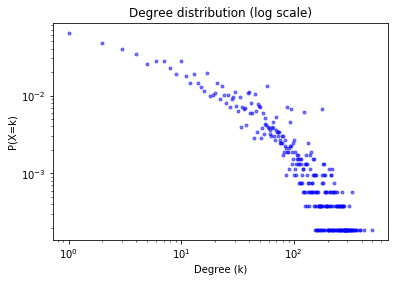

In [104]:
X, Y = [], []
for item in DegToCntV:
    val1 = item.GetVal1()
    val2 = item.GetVal2()

    if val1 != 0 and val2 != 0:
        X.append(val1)
        Y.append(val2)

# Turn Y into a probability distribution
Y /= np.sum(Y, dtype="float32")

plt.xscale('log')
plt.yscale('log')
plt.scatter(X, Y, color="blue", alpha=0.5, s=9)
plt.xlabel("Degree (k)")
plt.ylabel("P(X=k)")
plt.title("Degree distribution (log scale)")
plt.show()

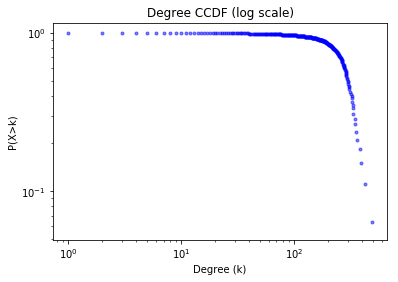

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 194, 195, 196, 197, 199, 200, 201, 203, 204, 205, 206, 207, 208, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 223, 224, 225, 227, 229, 23

In [181]:
CCDF_Y = np.cumsum(Y)[::-1]
plt.scatter(X, CCDF_Y, color="blue", alpha=0.5, s=9)
plt.xlabel("Degree (k)")
plt.ylabel("P(X>k)")
plt.title("Degree CCDF (log scale)")
plt.xscale('log')
plt.yscale('log')
plt.show()

print X

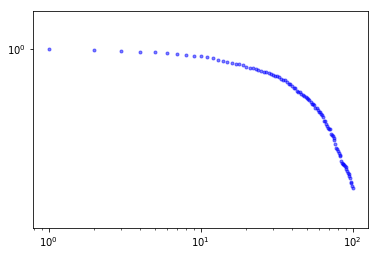

In [176]:
# Zoom in on the first 100 points
plt.scatter(X[:100], CCDF_Y[:100], color="blue", alpha=0.5, s=9)
plt.xscale('log')
plt.yscale('log')

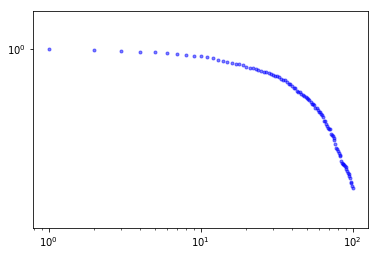

In [177]:
# Zoom in on the first 50 points
plt.scatter(X[:100], CCDF_Y[:100], color="blue", alpha=0.5, s=9)
plt.xscale('log')
plt.yscale('log')

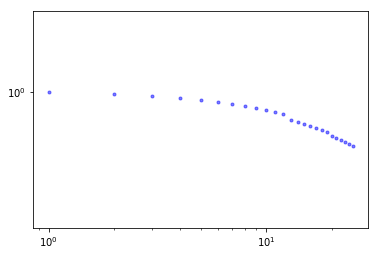

In [178]:
# Zoom in on the first 25 points
plt.scatter(X[:25], CCDF_Y[:25], color="blue", alpha=0.5, s=9)
plt.xscale('log')
plt.yscale('log')

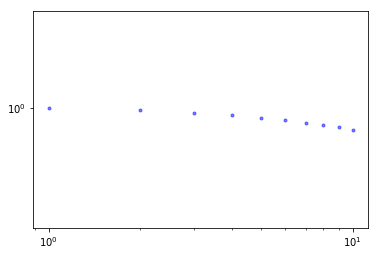

In [179]:
# Zoom in on the first 10 points
plt.scatter(X[:10], CCDF_Y[:10], color="blue", alpha=0.5, s=9)
plt.xscale('log')
plt.yscale('log')

From the above we conclude that x_m = 10 is the cutoff for the linear regime, so we only want to consider the 

[ 0.00011857 -0.00062774 -0.00137405 -0.00212035 -0.00286666 -0.00361297
 -0.00435927 -0.00510558 -0.00585189 -0.00659819 -0.0073445  -0.00809081
 -0.00883711 -0.00958342 -0.01032973 -0.01107603 -0.01182234 -0.01256865
 -0.01331495 -0.01406126]


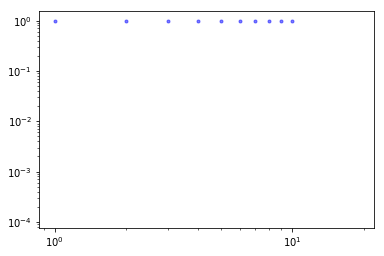

In [175]:
# x_m is the end of the linear regime of the CCDF
x_m = 10
plt.scatter(X[:x_m], CCDF_Y[:x_m], color="blue", alpha=0.5, s=9)
plt.xscale('log')
plt.yscale('log')
best_fit = np.polyfit(np.log10(X[:x_m]), np.log10(CCDF_Y[:x_m]), 1)

best_fit_X = np.arange(0, 20)
best_fit_Y = best_fit[1] + best_fit[0] * best_fit_X
plt.plot(best_fit_X, best_fit_Y, color="red")
print best_fit_Y
plt.show()

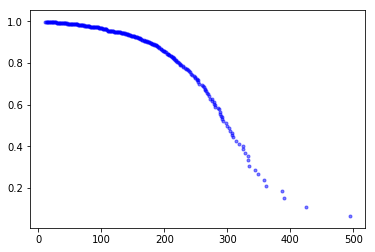

In [167]:
# Exponential regime from x_m to end
plt.scatter(X[x_m:], CCDF_Y[x_m:], color="blue", alpha=0.5, s=9)
plt.show()

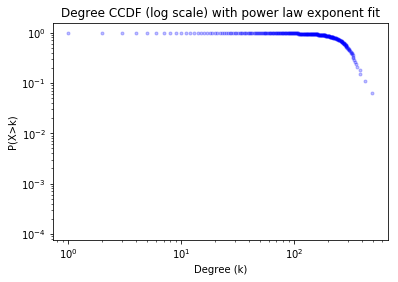

In [168]:
# Show line of best fit on full CCDF plot
best_fit_X = np.arange(0, 500)
best_fit_Y = best_fit[1] + best_fit[0] * best_fit_X
plt.scatter(X, CCDF_Y, color="blue", alpha=0.25, s=9)
plt.xlabel("Degree (k)")
plt.ylabel("P(X>k)")
plt.title("Degree CCDF (log scale) with power law exponent fit")
plt.xscale('log')
plt.yscale('log')
plt.plot(best_fit_X, best_fit_Y, color="red")
plt.show()